In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.read_csv('datasets/train.csv')
df_test = pd.read_csv('datasets/test.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Dicionário dos campos


- PassangerId = id do passageiro que embarcou
- Survided = identificação se aquele passageiro sobreviveu ou não o desastre
- pclass = a classe que o passageiro pertence
- sex = genero do passageiro
- age = idade do passageiro 
- sibSp = ainda estou um pouco confuso sobre isso
- parch = aqui também
- ticket = identificacao da passagem do passageiro
- fare = o quanto ele pagou pela passagem
- cabin = idendificacao da cabine do passageiro
- embarked = onde o passageiro embarcou

In [3]:
#identificando os valores nulos do dataset

df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

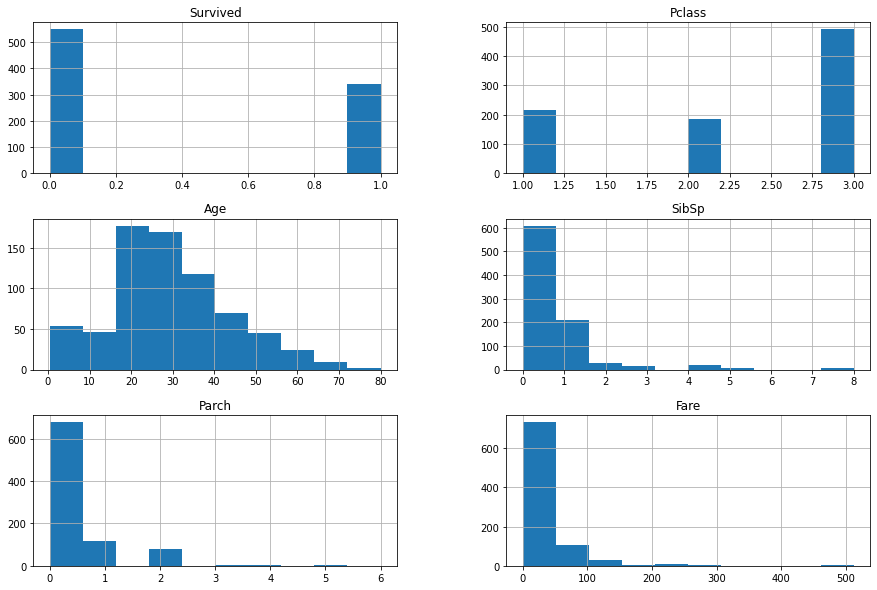

In [4]:
df_train.drop(columns = ['PassengerId']).hist(figsize=(15, 10))

In [5]:
# verificando se existe alguma correlação linear com a nossa variável alvo
df_train.corr()['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

Já podemos identificar uma forte correlação positiva entre o Fare (preço da passagem) com a nossa variável alvo. Ou seja, quanto mais caro é a passagem, maior é a concentração de pessoas que sobreviveram. Assim como podemos encontrar uma forte correlação negativa com o Pclass (classe que o passageiro pertence). Lembrando que a classe vai de 1 até 3, sendo o 1º classe a mais cara.</br>

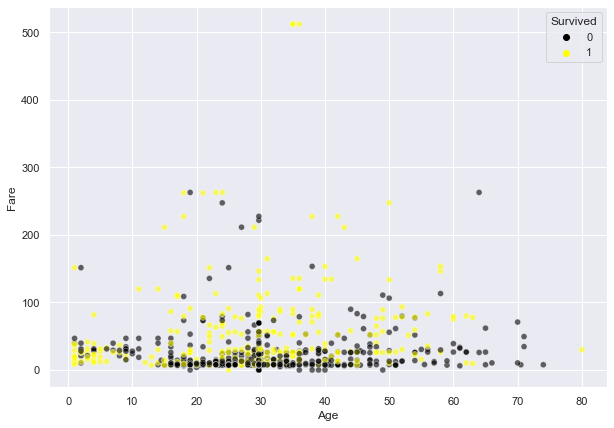

In [30]:
sns.set(style = 'darkgrid', palette = 'Spectral')

ax = sns.scatterplot(data = df_train, y = 'Fare', x = 'Age', hue='Survived', alpha=0.6, palette = ['black', 'yellow'])
ax.figure.set_size_inches(10, 7)

# <font color = 'orange'> Missing Values </font>


Temos alguns campos que estão nulos como o campo de Idade, Cabin e Embarked. O campo Cabin não vai ser tão relevante para nosso modelo, então vamos focar no campo idade e no campo Embarked.</br>

- Idade: para esse campo, podemos abordar com uma substituição dos valores nulos por uma média
- Embarked: como possui apenas dois valores, podemos dar um drop nas linhas que estão com os campos nulos que não vamos ter perdas significativas

### <font color = 'salmon'> Age </font>

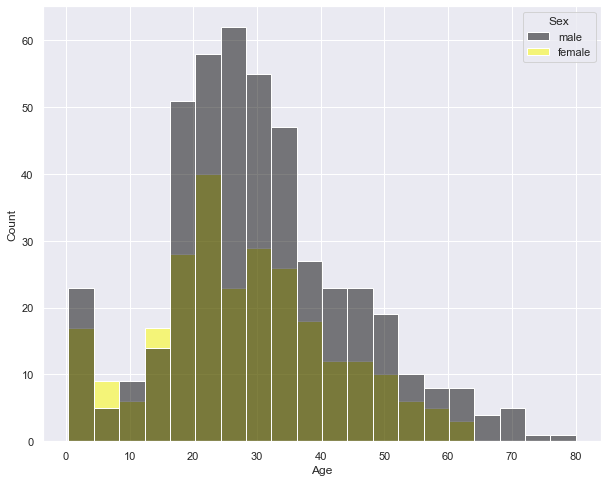

In [7]:
# Como vimos no histograma, o campo de idade tem uma boa distriuicao que se assemelha a um sino (Normal). 
# O que pode ser um bom indicativo de que a média vai funcionar para esse campo

ax = sns.histplot(data = df_train, x = 'Age', hue = 'Sex', palette = ['black', 'yellow'])
ax.figure.set_size_inches(10, 8)

In [9]:
from sklearn.impute import SimpleImputer

col = ['Age'] # coluna que queremos aplicar o metodo

im = SimpleImputer() # default ele utiliza a média como "strategy"

imputed = im.fit_transform(df_train[col])
df_train['Age'] = imputed

In [10]:
df_train.Age.describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

Parece que temos um ponto em que a idade dos passageiros está negativa. Podemos realizar o tratamento para esses casos. Vamos arredondar os valores para 1.

In [11]:
df_train.loc[df_train.Age < 1, 'Age'] = 1
df_train.Age.describe()

count    891.000000
mean      29.701172
std       12.997448
min        1.000000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

### <font color = 'salmon'> Embarked </font>

In [11]:
df_train.dropna(subset = ['Embarked'], inplace = True)

In [12]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [16]:
df_train.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,891.0,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.7,0.52,0.38,32.20
std,257.35,0.49,0.84,13.0,1.10,0.81,49.69
min,1.00,0.00,1.00,1.0,0.00,0.00,0.00
25%,223.50,0.00,2.00,22.0,0.00,0.00,7.91
50%,446.00,0.00,3.00,29.7,0.00,0.00,14.45
75%,668.50,1.00,3.00,35.0,1.00,0.00,31.00
max,891.00,1.00,3.00,80.0,8.00,6.00,512.33


# <font color = 'orange' >Análise Exploratória de Dados </font>


##  <font color = 'salmon'> Investigando pessoas que entraram de graça no navio </font>

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

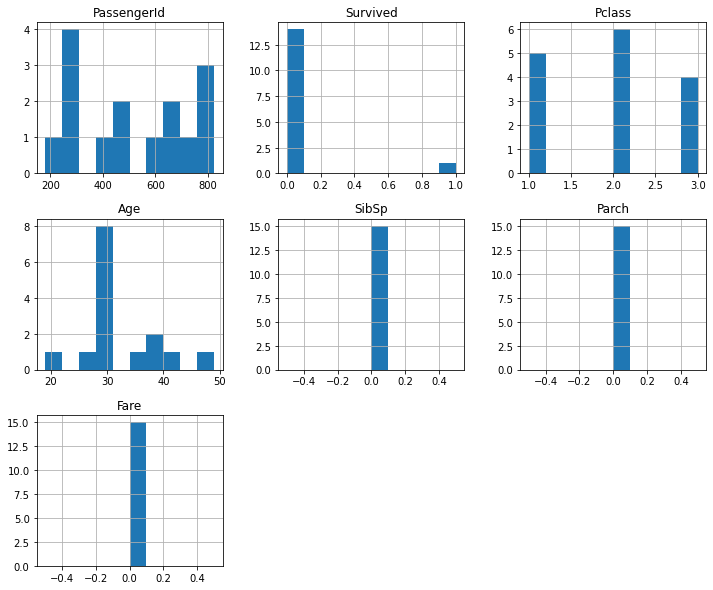

In [22]:
pessoas_entraram_gratis = df_train.loc[df_train.Fare < 1]

pessoas_entraram_gratis.hist(figsize=(12, 10))

In [24]:
df_train.loc[df_train.Survived == 1].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.000000,342.0,342.000000,342.000000,342.000000,342.000000,342.000000
mean,444.368421,1.0,1.950292,28.555129,0.473684,0.464912,48.395408
std,252.358840,0.0,0.863321,13.761690,0.708688,0.771712,66.596998
min,2.000000,1.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,250.750000,1.0,1.000000,21.000000,0.000000,0.000000,12.475000
50%,439.500000,1.0,2.000000,29.699118,0.000000,0.000000,26.000000
75%,651.500000,1.0,3.000000,35.000000,1.000000,1.000000,57.000000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


In [28]:
pessoas_entraram_gratis.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.000000,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.000000,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,29.699118,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,0.0,NaN,S


In [26]:
pessoas_entraram_gratis.loc[pessoas_entraram_gratis.Survived == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S


In [29]:
df_train.loc[df_train.Ticket == 'LINE']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S


In [33]:
pessoas_entraram_gratis.corr()['Survived'].sort_values(ascending = False)

Survived       1.000000
Pclass         0.369406
Age           -0.280542
PassengerId   -0.299418
SibSp               NaN
Parch               NaN
Fare                NaN
Name: Survived, dtype: float64

# Data Engineering

In [13]:
df_train.head()    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
# Aplicando a regra de sturges para criarmos classes para nossos dados
from math import ceil #import da ceil para arredondamento para cima da amplitude de classes

at = df_train.Age.max() - df_train.Age.min()
n = df_train.Age.shape[0]
n_classes = round(1 + 3.3 * np.log10(n))

at_classes = ceil(at / n_classes)

print('Amplitude: ', n_classes)
print('Num de classes: ', n_classes)
print('Amplitude de classes: ', at_classes)

Amplitude:  11
Num de classes:  11
Amplitude de classes:  8
